In [4]:
import torch
import torchvision.transforms.v2 as transforms
import torchvision.io as tv_io

import json
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

False

In [5]:
# LOADING THE MODEL
from torchvision.models import vgg16
from torchvision.models import VGG16_Weights

weights=VGG16_Weights.DEFAULT
model=vgg16(weights=weights)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 94.9MB/s]


In [6]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
pre_trans=weights.transforms()
pre_trans

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
  image=mpimg.imread(image_path)
  plt.imshow(image)


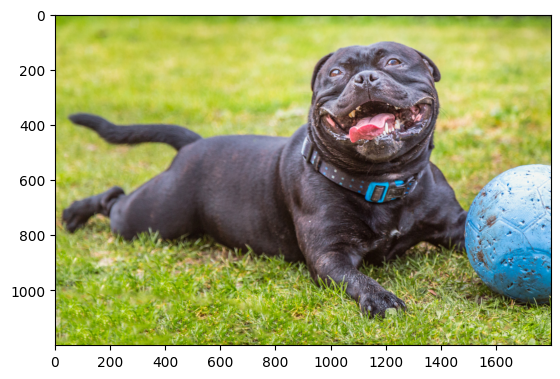

In [11]:
show_image("/content/happy_dog.jpg")

In [12]:
def load_and_process_image(file_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(file_path).shape)

    image = tv_io.read_image(file_path).to(device)
    image = pre_trans(image)  # weights.transforms()
    image = image.unsqueeze(0)  # Turn into a batch
    return image

In [14]:
processed_image = load_and_process_image("/content/happy_dog.jpg")
print("Processed image shape: ", processed_image.shape)

Original image shape:  (1200, 1800, 3)
Processed image shape:  torch.Size([1, 3, 224, 224])


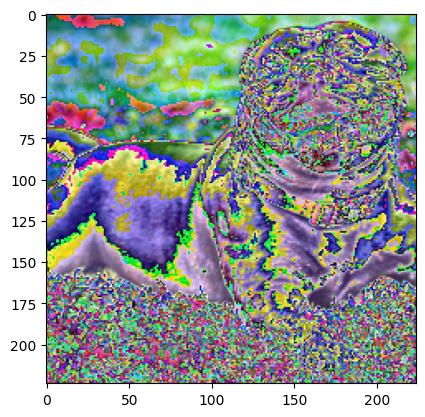

In [15]:
import torchvision.transforms.functional as F
plot_image = F.to_pil_image(torch.squeeze(processed_image))
plt.imshow(plot_image, cmap='gray')

In [16]:
vgg_classes = json.load(open("/content/imagenet_class_index.json"))

In [18]:
vgg_classes["0"]

['n01440764', 'tench']

In [19]:
def readable_prediction(image_path):
    # Show image
    show_image(image_path)
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    output = model(image)[0]  # Unbatch
    predictions = torch.topk(output, 3)
    indices = predictions.indices.tolist()
    # Print predictions in readable form
    out_str = "Top results: "
    pred_classes = [vgg_classes[str(idx)][1] for idx in indices]
    out_str += ", ".join(pred_classes)
    print(out_str)

    return predictions

Original image shape:  (1200, 1800, 3)
Top results: tiger_cat, tabby, Egyptian_cat


torch.return_types.topk(
values=tensor([19.0596, 16.9437, 15.4599], grad_fn=<TopkBackward0>),
indices=tensor([282, 281, 285]))

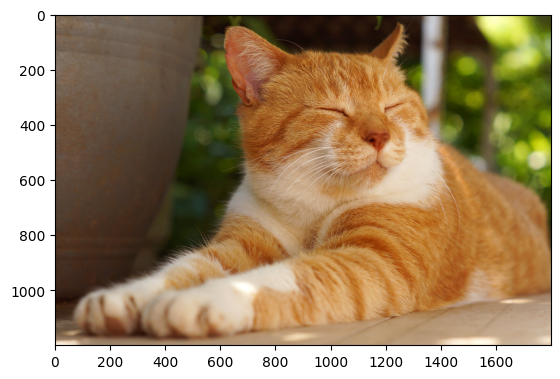

In [20]:
readable_prediction("/content/sleepy_cat.jpg")

In [21]:
# SOLUTION
import numpy as np

def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    idx = model(image).argmax(dim=1).item()
    print("Predicted index:", idx)
    if 151 <= idx <= 268:
        print("Doggy come on in!")
    elif 281 <= idx <= 285:
        print("Kitty stay inside!")
    else:
        print("You're not a dog! Stay outside!")

Original image shape:  (1200, 1800, 3)
Predicted index: 282
Kitty stay inside!


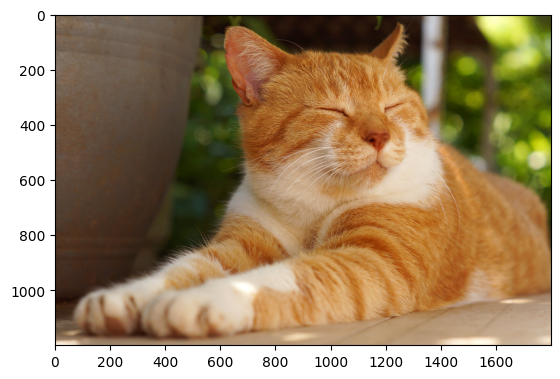

In [22]:
doggy_door("/content/sleepy_cat.jpg")

In [23]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}